# Лабораторна робота 3

З генеральної сукупності взято вибірку:

In [1]:
import numpy as np

l = """
8 4 4  7  5 5  5 3 10  2  3 6 7 6 10
6 7 7  6 10 7  6 8 10  7  7 9 1 3  4
7 4 4  5  4 9  6 5  9  5  6 5 6 4  7
2 5 7  6  7 3  8 8  7  4  7 5 7 6  6
5 6 6  6 12 5 11 8  1 10 10 9 1 4  5 
6 8 4 10 8 """
a = [int(s) for s in l.split()]
an = np.array(a)
an

array([ 8,  4,  4,  7,  5,  5,  5,  3, 10,  2,  3,  6,  7,  6, 10,  6,  7,
        7,  6, 10,  7,  6,  8, 10,  7,  7,  9,  1,  3,  4,  7,  4,  4,  5,
        4,  9,  6,  5,  9,  5,  6,  5,  6,  4,  7,  2,  5,  7,  6,  7,  3,
        8,  8,  7,  4,  7,  5,  7,  6,  6,  5,  6,  6,  6, 12,  5, 11,  8,
        1, 10, 10,  9,  1,  4,  5,  6,  8,  4, 10,  8])

абсолютні частоти

In [2]:
import collections
counter = collections.Counter(an)
l_keys = list(counter.keys())
l_values = list(counter.values()) 
print(l_keys)
print(l_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[3, 2, 4, 10, 12, 15, 14, 7, 4, 7, 1, 1]


Варіаційний ряд відносних частот

In [3]:
print(l_keys)
print(l_values)
l_rel =[]
for i in l_values:
    l_rel.append(round(i / len(an), 3))
print(l_rel)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[3, 2, 4, 10, 12, 15, 14, 7, 4, 7, 1, 1]
[0.037, 0.025, 0.05, 0.125, 0.15, 0.188, 0.175, 0.087, 0.05, 0.087, 0.013, 0.013]


Накопичені частоти

In [4]:
cumulative_frequencies = np.cumsum(l_rel).round(3)
cumulative_frequencies

array([ 0.037,  0.062,  0.112,  0.237,  0.387,  0.575,  0.75 ,  0.837,
        0.887,  0.974,  0.987,  1.   ])

Складемо другу статистичну таблицю

In [5]:
l_rel = np.array(l_rel).round(3)
import pandas as pd
x = pd.DataFrame({'Варіанта': range(len(l_keys)), 'Абсолютні частоти': l_values,
                  'Відносні частоти': l_rel, 
                  'Накопичені частоти': cumulative_frequencies})
x

,Абсолютні частоти,Варіанта,Відносні частоти,Накопичені частоти
0,3,0,0.037,0.037
1,2,1,0.025,0.062
2,4,2,0.050,0.112
3,10,3,0.125,0.237
4,12,4,0.150,0.387
5,15,5,0.188,0.575
6,14,6,0.175,0.750
7,7,7,0.087,0.837
8,4,8,0.050,0.887
9,7,9,0.087,0.974


$x_i * n_i$

In [6]:
xi_ni = np.array(l_keys) * np.array(l_values)
xi_ni

array([ 3,  4, 12, 40, 60, 90, 98, 56, 36, 70, 11, 12])

$\lambda$

In [7]:
print(xi_ni.sum())
print(sum(l_values))
lambdaa = xi_ni.sum() / sum(l_values)
lambdaa

492
80


6.1500000000000004

$\lambda_i$

In [8]:
lambda_i = np.power(lambdaa, np.array(l_keys))
lambda_i

array([  6.15000000e+00,   3.78225000e+01,   2.32608375e+02,
         1.43054151e+03,   8.79783026e+03,   5.41066561e+04,
         3.32755935e+05,   2.04644900e+06,   1.25856614e+07,
         7.74018173e+07,   4.76021177e+08,   2.92753024e+09])

i!

In [9]:
from scipy.special import factorial
factorials = factorial(np.array(l_keys), exact=True)
factorials

array([        1,         2,         6,        24,       120,       720,
            5040,     40320,    362880,   3628800,  39916800, 479001600])

$e^h$

In [10]:
np.exp(1)
e_h = np.power(np.full((len(l_keys)), np.exp(1)), lambdaa * -1)
e_h

array([ 0.00213348,  0.00213348,  0.00213348,  0.00213348,  0.00213348,
        0.00213348,  0.00213348,  0.00213348,  0.00213348,  0.00213348,
        0.00213348,  0.00213348])

$P_i$

In [11]:
Pi = lambda_i * e_h / factorials
Pi

array([ 0.01312091,  0.04034681,  0.08271095,  0.12716809,  0.15641675,
        0.16032717,  0.14085887,  0.10828526,  0.07399493,  0.04550688,
        0.02544248,  0.01303927])

Ni`=Ni*Pi

In [12]:
Ni = np.full((len(l_keys)), np.array(sum(l_values))) * Pi
Ni

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(12, array(80)) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


array([  1.04967303,   3.22774457,   6.61687637,  10.17344742,
        12.51334032,  12.82617383,  11.26870986,   8.66282071,
         5.91959415,   3.6405504 ,   2.03539863,   1.0431418 ])

Ni-Ni`

In [13]:
abs_Ni = np.array(l_values) - Ni
abs_Ni

array([ 1.95032697, -1.22774457, -2.61687637, -0.17344742, -0.51334032,
        2.17382617,  2.73129014, -1.66282071, -1.91959415,  3.3594496 ,
       -1.03539863, -0.0431418 ])

Ni-Ni`*Ni-Ni`

In [14]:
abs_Ni_2 = abs_Ni * abs_Ni
abs_Ni_2

array([  3.80377529e+00,   1.50735673e+00,   6.84804193e+00,
         3.00840062e-02,   2.63518286e-01,   4.72552022e+00,
         7.45994580e+00,   2.76497271e+00,   3.68484170e+00,
         1.12859016e+01,   1.07205033e+00,   1.86121491e-03])

Ni-Ni`*Ni-Ni`/n`i

In [15]:
abs_Ni_2_Ni = abs_Ni_2 / Ni
abs_Ni_2_Ni

array([  3.62377157e+00,   4.67000005e-01,   1.03493575e+00,
         2.95711031e-03,   2.10589882e-02,   3.68427894e-01,
         6.62005313e-01,   3.19176952e-01,   6.22482152e-01,
         3.10005366e+00,   5.26702885e-01,   1.78423961e-03])

In [16]:
abs_Ni_2_Ni.sum()

10.750356519659301

In [17]:
import math
(abs_Ni_2_Ni.sum() - 2) / math.sqrt(2 * 2)

4.3751782598296503

Вторинна таблиця розподілу: 

In [18]:
x = pd.DataFrame({'Варіанта': range(len(l_keys)), '$x_i * n_i$': xi_ni, '$\lambda^i$': lambda_i, 
                  'i!': factorials, '$e^h$': e_h, '$P_i$': Pi, "$N_i*P_i$": Ni,
                  "Ni-Ni`": abs_Ni, "Ni-Ni`*Ni-Ni`": abs_Ni_2, "Ni-Ni`*Ni-Ni`/n`i": abs_Ni_2_Ni})
x

,$N_i*P_i$,$P_i$,$\lambda^i$,$e^h$,$x_i * n_i$,Ni-Ni`,Ni-Ni`*Ni-Ni`,Ni-Ni`*Ni-Ni`/n`i,i!,Варіанта
0,1.049673,0.013121,6.150000e+00,0.002133,3,1.950327,3.803775,3.623772,1,0
1,3.227745,0.040347,3.782250e+01,0.002133,4,-1.227745,1.507357,0.467000,2,1
2,6.616876,0.082711,2.326084e+02,0.002133,12,-2.616876,6.848042,1.034936,6,2
3,10.173447,0.127168,1.430542e+03,0.002133,40,-0.173447,0.030084,0.002957,24,3
4,12.513340,0.156417,8.797830e+03,0.002133,60,-0.513340,0.263518,0.021059,120,4
5,12.826174,0.160327,5.410666e+04,0.002133,90,2.173826,4.725520,0.368428,720,5
6,11.268710,0.140859,3.327559e+05,0.002133,98,2.731290,7.459946,0.662005,5040,6
7,8.662821,0.108285,2.046449e+06,0.002133,56,-1.662821,2.764973,0.319177,40320,7
8,5.919594,0.073995,1.258566e+07,0.002133,36,-1.919594,3.684842,0.622482,362880,8
9,3.640550,0.045507,7.740182e+07,0.002133,70,3.359450,11.285902,3.100054,3628800,9


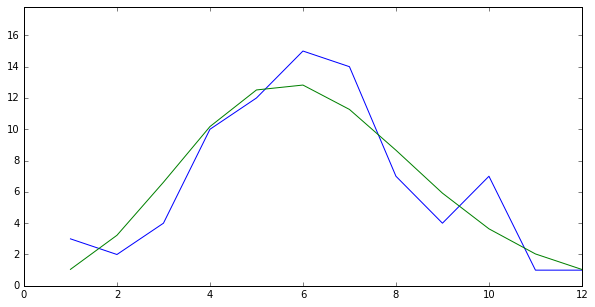

In [22]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 5
plt.xlim(0, len(l_keys))
plt.ylim(0, max(Ni) + 5)
plt.plot(l_keys, l_values)
plt.plot(l_keys, Ni)
plt.show()